# 7.1 趋势跟踪与均值回复

## 7.1.1 趋势跟踪和均值回复的周期重叠性

In [11]:
import abupy
from abupy import ABuSymbolPd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
abupy.env.enable_example_env_ipython()

enable example env will only read RomDataBu/csv


In [13]:
kl_pd =ABuSymbolPd.make_kl_df('usTSLA', n_folds=2)
kl_pd.tail()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2016-07-20,228.36,229.800,225.00,1.38,226.47,225.26,2568498,20160720,2,499,9.1923,8.7234
2016-07-21,220.50,227.847,219.10,-3.44,226.00,228.36,4428651,20160721,3,500,9.1711,8.7251
2016-07-22,222.27,224.500,218.88,0.80,221.99,220.50,2579692,20160722,4,501,9.1858,8.7790
2016-07-25,230.01,231.390,221.37,3.48,222.27,222.27,4490683,20160725,0,502,9.2669,8.9298
2016-07-26,225.93,228.740,225.63,-1.77,227.34,230.01,41833,20160726,1,503,9.1337,8.7541


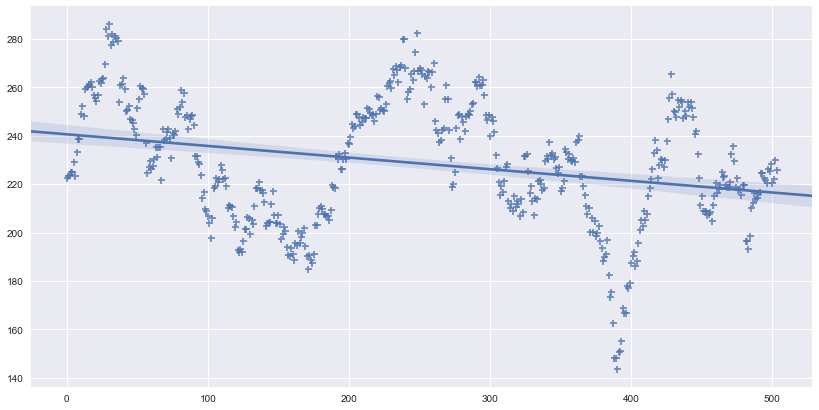

In [14]:
sns.set_context(rc={'figgure.figsize':(14,7)})
sns.regplot(x=np.arange(0, kl_pd.shape[0]), y=kl_pd.close.values, marker='+')
plt.show()

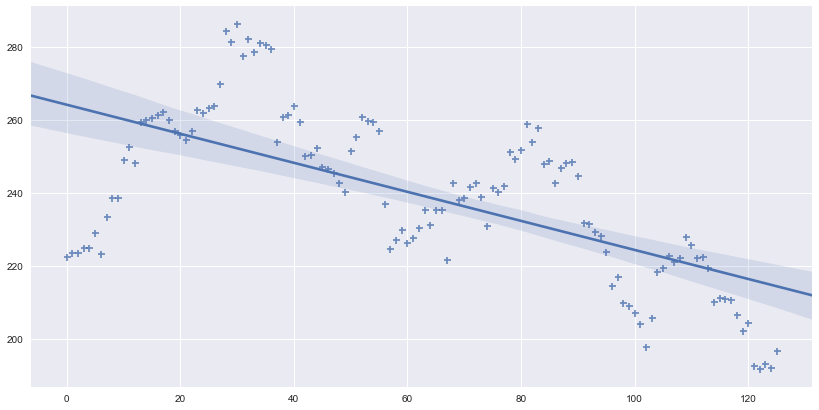

In [16]:
start = 0
end = int(kl_pd.shape[0] / 4)
x = np.arange(start, end)
y = kl_pd.close.values[start:end]
sns.regplot(x=x, y=y, marker='+')
plt.show()

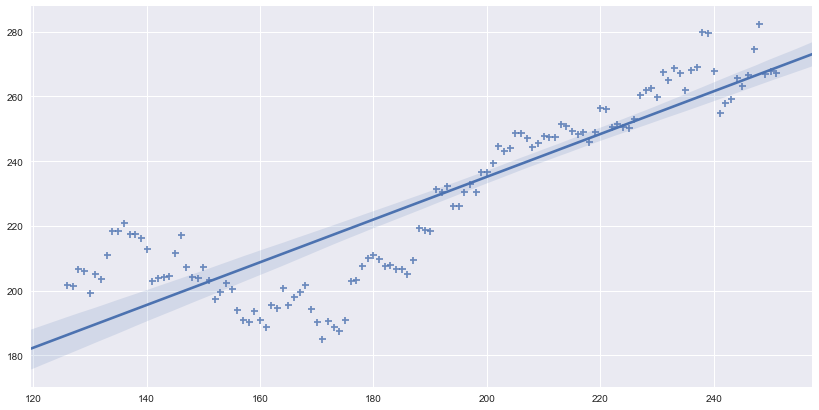

In [18]:
start = int(kl_pd.shape[0] / 4)
end = start + int(kl_pd.shape[0] / 4)
sns.regplot(x=np.arange(start, end), y=kl_pd.close.values[start:end], marker='+')
plt.show()

## 7.1.2 实例1:均值恢复策略

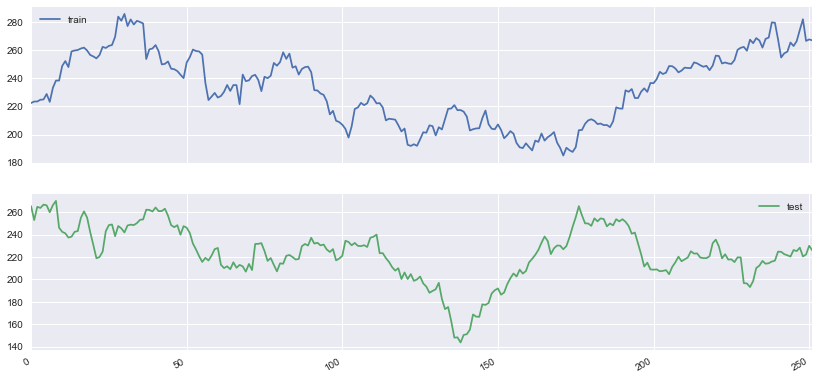

In [22]:
import pandas as pd
kl_pd = ABuSymbolPd.make_kl_df('usTSLA', n_folds=2)
train_kl = kl_pd[:252]
test_kl=kl_pd[252:]
# 数据展示在下面
tmp_df = pd.DataFrame(
    np.array([train_kl.close.values, test_kl.close.values]).T,
    columns=['train', 'test']
)
tmp_df[['train','test']].plot(subplots=True, grid=True, figsize=(14,7))
plt.show()

In [27]:
tmp_df = pd.DataFrame(
    np.array([train_kl.close.values, test_kl.close.values]).T,
    columns=['train', 'test']
)
print(tmp_df.head())
# print(np.array([train_kl.close.values, test_kl.close.values]))

    train    test
0  222.49  265.41
1  223.54  253.01
2  223.57  264.82
3  224.82  263.82
4  225.01  266.79


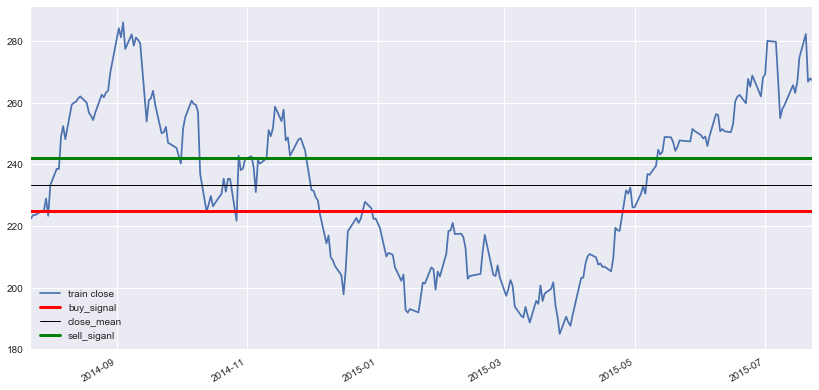

In [29]:
close_mean = train_kl.close.mean()
close_std = train_kl.close.std()
sell_signal = close_mean + close_std / 3
buy_signal = close_mean - close_std / 3
plt.figure(figsize=(14,7))
train_kl.close.plot()
plt.axhline(buy_signal, color='r', lw=3)
plt.axhline(close_mean, color='black', lw=1)
plt.axhline(sell_signal, color='g', lw=3)
plt.legend(['train close', 'buy_signal', 'close_mean', 'sell_siganl'], loc='best')
plt.show()

带入回归测试数据可视化

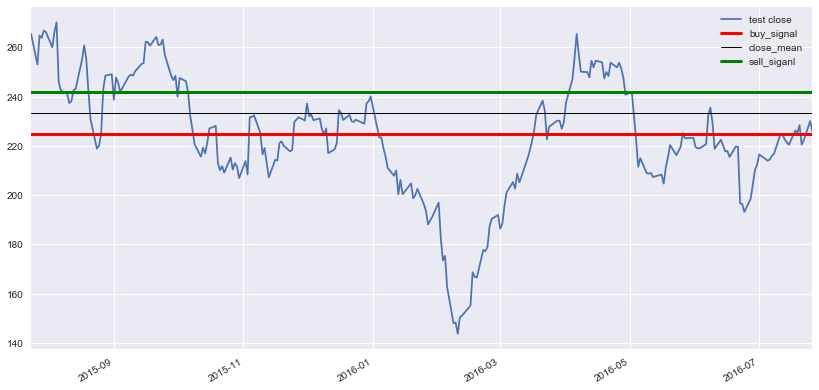

In [30]:
plt.figure(figsize=(14,7))
test_kl.close.plot()
plt.axhline(buy_signal, color='r', lw=3)
plt.axhline(close_mean, color='black', lw=1)
plt.axhline(sell_signal, color='g', lw=3)
plt.legend(['test close', 'buy_signal', 'close_mean', 'sell_siganl'], loc='best')
plt.show()

In [31]:
print('买入信号阀值{}, 卖出信号阀值{}'.format(buy_signal, sell_signal))

买入信号阀值224.88505691244367, 卖出信号阀值241.9443875320005


有了买卖的信号,将操作的信号,转为持股

In [32]:
buy_index = test_kl[test_kl['close'] < buy_signal].index
test_kl.loc[buy_index, 'signal'] = 1
test_kl[52:57]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14,signal
2015-10-07,231.96,237.70,229.12,-3.93,236.63,241.46,6813959,20151007,2,304,11.7420,11.6520,NaN
2015-10-08,226.72,230.72,221.31,-2.26,230.08,231.96,6133216,20151008,3,305,12.1423,12.2590,NaN
2015-10-09,220.69,224.37,218.36,-2.66,220.93,226.72,6158370,20151009,4,306,12.2118,12.3548,1.0
2015-10-12,215.58,223.00,215.27,-2.32,222.99,220.69,3836303,20151012,0,307,12.1755,12.2902,1.0
2015-10-13,219.25,222.52,211.13,1.70,213.28,215.58,5171535,20151013,1,308,12.1381,12.2259,1.0


构建卖出信号 signal = 0

In [33]:
sell_index = test_kl[test_kl['close'] > sell_signal].index
test_kl.loc[sell_index, 'signal'] = 0
test_kl[48:53]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14,signal
2015-10-01,239.88,248.50,237.13,-3.43,247.51,248.40,4572964,20151001,3,300,11.4294,11.1055,NaN
2015-10-02,247.57,247.70,234.93,3.21,235.60,239.88,4423982,20151002,4,301,11.5265,11.2744,0.0
2015-10-05,246.15,249.84,244.13,-0.57,248.84,247.57,3689865,20151005,0,302,11.4519,11.1805,0.0
2015-10-06,241.46,243.03,235.58,-1.91,240.00,246.15,5235897,20151006,1,303,11.4776,11.2383,NaN
2015-10-07,231.96,237.70,229.12,-3.93,236.63,241.46,6813959,20151007,2,304,11.7420,11.6520,NaN


将操作转化为持股

In [36]:
test_kl['keep'] = test_kl['signal']
test_kl['keep'].fillna(method='ffill', inplace=True)
test_kl[48:58]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14,signal,keep
2015-10-01,239.88,248.50,237.13,-3.43,247.51,248.40,4572964,20151001,3,300,11.4294,11.1055,NaN,0.0
2015-10-02,247.57,247.70,234.93,3.21,235.60,239.88,4423982,20151002,4,301,11.5265,11.2744,0.0,0.0
2015-10-05,246.15,249.84,244.13,-0.57,248.84,247.57,3689865,20151005,0,302,11.4519,11.1805,0.0,0.0
2015-10-06,241.46,243.03,235.58,-1.91,240.00,246.15,5235897,20151006,1,303,11.4776,11.2383,NaN,0.0
2015-10-07,231.96,237.70,229.12,-3.93,236.63,241.46,6813959,20151007,2,304,11.7420,11.6520,NaN,0.0
2015-10-08,226.72,230.72,221.31,-2.26,230.08,231.96,6133216,20151008,3,305,12.1423,12.2590,NaN,0.0
2015-10-09,220.69,224.37,218.36,-2.66,220.93,226.72,6158370,20151009,4,306,12.2118,12.3548,1.0,1.0
2015-10-12,215.58,223.00,215.27,-2.32,222.99,220.69,3836303,20151012,0,307,12.1755,12.2902,1.0,1.0
2015-10-13,219.25,222.52,211.13,1.70,213.28,215.58,5171535,20151013,1,308,12.1381,12.2259,1.0,1.0
2015-10-14,216.88,220.95,215.43,-1.08,220.67,219.25,3104446,20151014,2,309,11.8229,11.7469,1.0,1.0


计算收益用于对比,使用两种方式来对比结算结果

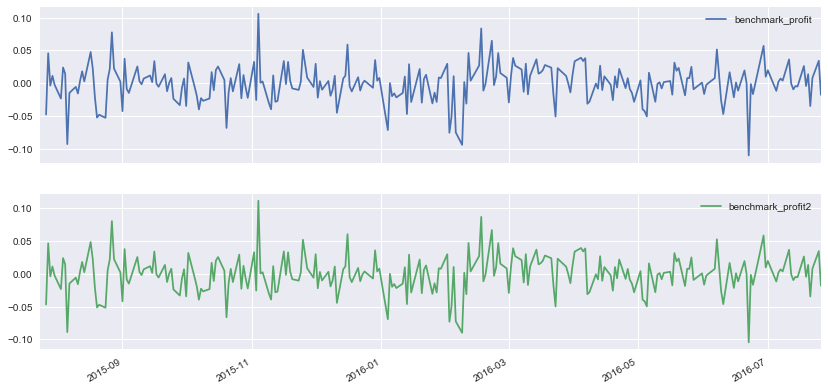

In [40]:
test_kl['benchmark_profit'] = np.log(test_kl['close']/test_kl['close'].shift(1))
test_kl['benchmark_profit2'] = test_kl['close']/test_kl['close'].shift(1) - 1
test_kl[['benchmark_profit', 'benchmark_profit2']].plot(subplots=True, grid=True, figsize=(14,7))
plt.show()

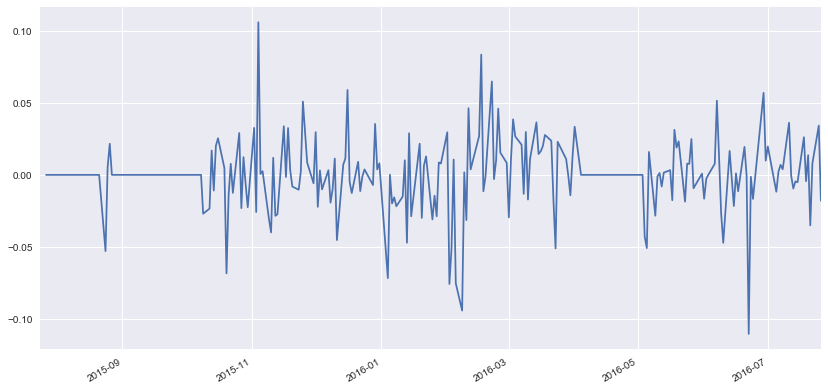

In [41]:
test_kl['trend_profit'] = test_kl['keep'] * test_kl['benchmark_profit']
test_kl['trend_profit'].plot(figsize=(14,7))
plt.show()

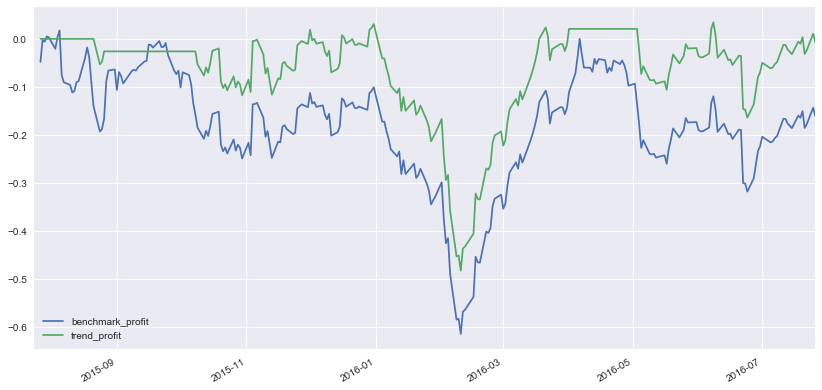

In [42]:
test_kl[['benchmark_profit', 'trend_profit']].cumsum().plot(grid=True, figsize=(14,7))
plt.show()

In [43]:
print('本金10万的回报20%, 10年后收益为:{}'.format(round(100000 * (1+0.2)**10)))
print('本金10万的回报30%, 10年后收益为:{}'.format(round(100000 * (1+0.3)**10)))

本金10万的回报20%, 10年后收益为:619174
本金10万的回报30%, 10年后收益为:1378585


# 7.1.3 实例2: 趋势跟踪策略

In [45]:
N1=42
N2=21
demo_list= np.array([1,2,1,1,100,1000])
pd.rolling_max(demo_list, window=3)

array([   nan,    nan,     2.,     2.,   100.,  1000.])

In [46]:
kl_pd['n1_high'] = pd.rolling_max(kl_pd['high'], window=N1)
kl_pd[0:5]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14,n1_high
2014-07-23,222.49,224.75,219.43,1.33,220.01,219.58,3088731,20140723,2,0,8.9775,8.4591,NaN
2014-07-24,223.54,225.10,220.80,0.47,223.25,222.49,3248410,20140724,3,1,8.8129,8.2492,NaN
2014-07-25,223.57,226.97,221.75,0.01,222.72,223.54,3090383,20140725,4,2,8.6418,8.0328,NaN
2014-07-28,224.82,232.00,221.40,0.56,224.25,223.57,6517611,20140728,0,3,8.7351,8.2162,NaN
2014-07-29,225.01,228.30,224.86,0.08,226.61,224.82,3387187,20140729,1,4,8.5443,7.9672,NaN


In [47]:
pd.expanding_max(demo_list)

array([    1.,     2.,     2.,     2.,   100.,  1000.])

这个函数是从第一个数据开始,寻找列表中的最大值

In [48]:
expan_max= pd.expanding_max(kl_pd['close'])
kl_pd['n1_high'].fillna(value=expan_max, inplace=True)
kl_pd[0:5]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14,n1_high
2014-07-23,222.49,224.75,219.43,1.33,220.01,219.58,3088731,20140723,2,0,8.9775,8.4591,222.49
2014-07-24,223.54,225.10,220.80,0.47,223.25,222.49,3248410,20140724,3,1,8.8129,8.2492,223.54
2014-07-25,223.57,226.97,221.75,0.01,222.72,223.54,3090383,20140725,4,2,8.6418,8.0328,223.57
2014-07-28,224.82,232.00,221.40,0.56,224.25,223.57,6517611,20140728,0,3,8.7351,8.2162,224.82
2014-07-29,225.01,228.30,224.86,0.08,226.61,224.82,3387187,20140729,1,4,8.5443,7.9672,225.01


In [49]:
kl_pd['n2_low']=pd.rolling_min(kl_pd['low'], window=N2)
expan_min=pd.expanding_min(kl_pd['close'])
kl_pd['n2_low'].fillna(value=expan_min, inplace=True)
# 根据突破的定义来构建signal列
buy_index = kl_pd[kl_pd['close'] > kl_pd['n1_high'].shift(1)].index
kl_pd.loc[buy_index, 'signal'] = 1
sell_index = kl_pd[kl_pd['close'] < kl_pd['n2_low'].shift(1)].index
kl_pd.loc[sell_index, 'signal'] = 0

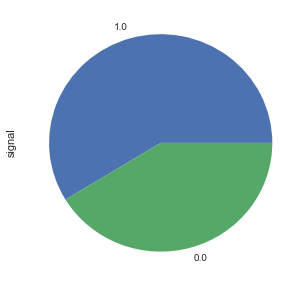

In [50]:
kl_pd.signal.value_counts().plot(kind='pie', figsize=(5,5))
plt.show()

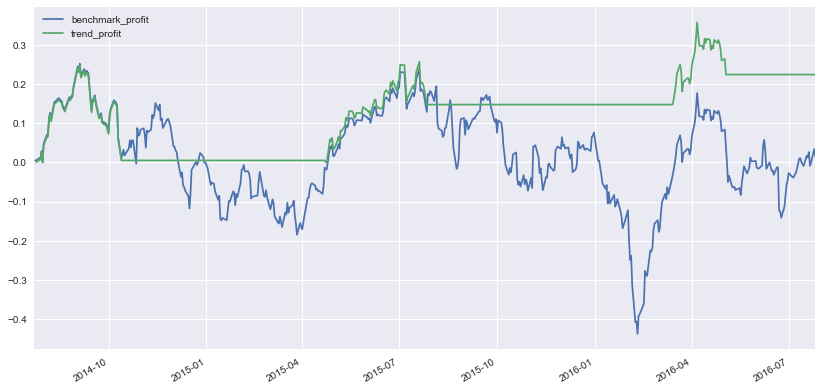

In [51]:
kl_pd['keep'] = kl_pd['signal'].shift(1)
kl_pd['keep'].fillna(method='ffill', inplace=True)
# 计算基准收益
kl_pd['benchmark_profit'] = np.log(kl_pd['close'] / kl_pd['close'].shift(1))
# 计算使用趋势突破策略的收益
kl_pd['trend_profit'] = kl_pd['keep'] * kl_pd['benchmark_profit']
# 可视化收益的情况对比
kl_pd[['benchmark_profit', 'trend_profit']].cumsum().plot(grid=True, figsize=(14,7))
plt.show()

# 7.2 仓位控制管理

## 均值方差模型--需要深入了解

## 7.2.1 凯利公式

## 7.2.2 一支股票的时间简史

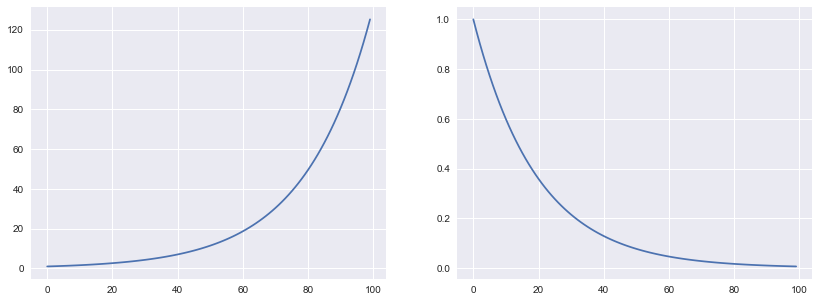

In [52]:
# 第一阶段走势涵盖股票上市后前100天走势情况
trade_day = 100
# 这个股票第一阶段走势函数gen_stock_price_array()
def gen_stock_price_array():
    # 股票的初始价格为1 元钱
    price_array = np.ones(trade_day)
    
    # 以时间为驱动100个交易日, 生成100个交易日走势
    for ind in np.arange(0, trade_day - 1):
        if ind == 0:
            # 第一个交易日 50% 的概率结果是win
            win = np.random.binomial(1, 0.5)
        else:
            # 非第一日时它的涨跌幅与只与前一天的涨跌相关,如果前一天是上涨的,那么今天仍然上涨,如果前一天下跌,那么今天仍然下跌
            win = price_array[ind] > price_array[ind - 1]
            
        if win:
            # 每次上涨只能上涨5%
            price_array[ind + 1] = (1+0.05) * price_array[ind]
        else:
            price_array[ind+ 1] = (1- 0.05) * price_array[ind]
    return price_array

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
price_array1 = gen_stock_price_array()
price_array1_ex = gen_stock_price_array()
axs[0].plot(price_array1)
axs[1].plot(price_array1_ex)
plt.show()

第二种情况设定
如果连续上涨了3天,第4天及以后下跌的概率为55%
如果连续下跌了3天,第4天及以后上涨的概率为80%

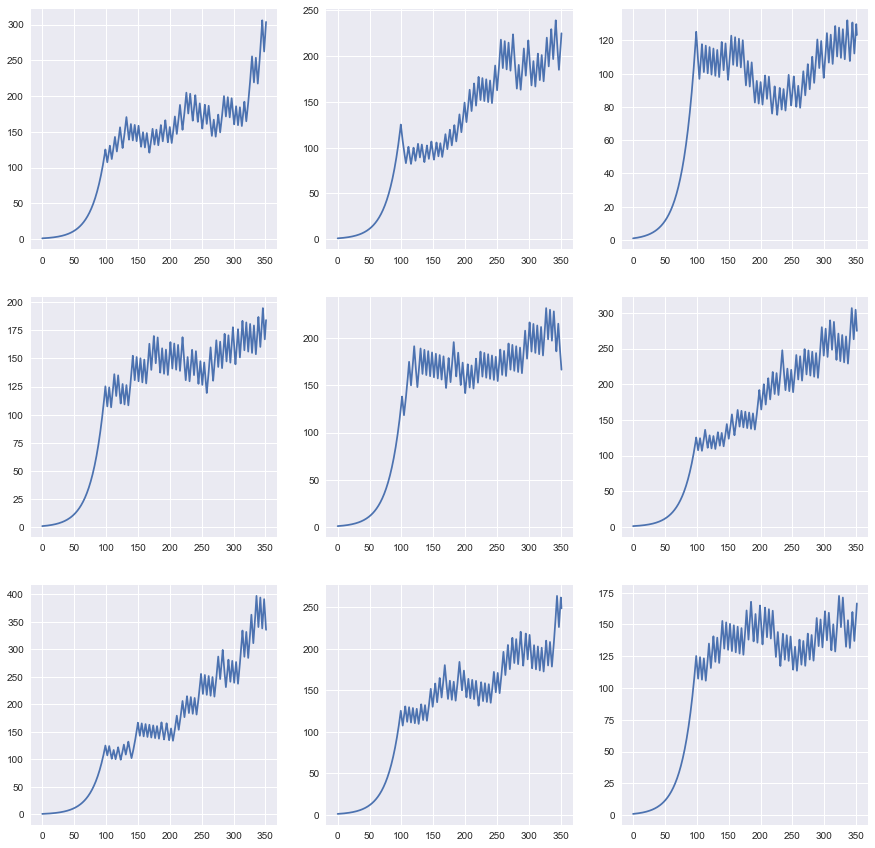

In [53]:
trade_day = 252
def gen_stock_price_array2():
    # np.concatenate 连接之前的100天走势和目前252的走势
    price_array = np.concatenate((price_array1, np.ones(trade_day) * price_array1[-1]), axis = 0)
    
    for ind in np.arange(len(price_array1) - 1, len(price_array) -1):
        # 获取当前叫日为基准的四个交易日数据
        last4 = price_array[ind - 3: ind + 1]
        if len(last4) == 4 and last4[-1] > last4[-2] and last4[-2] > last4[-3] and last4[-3] > last4[-4]:
            # 如果连续上涨了3天,第4天及以后下跌的概率为55%
            win = np.random.binomial(1, 0.45)
        elif len(last4) == 4 and last4[-1] < last4[-2] and last4[-2] < last4[-3] and last4[-3] < last4[-4]:
            # 如果连续下跌了3天,第4天及以后上涨的概率为80%
            win = np.random.binomial(1, 0.8)
        else:
            win = price_array[ind] > price_array[ind - 1]
            
        if win:
            price_array[ind + 1] = (1+0.05) * price_array[ind]
        else:
            price_array[ind + 1] = (1- 0.05) * price_array[ind]
    return price_array

import itertools
_, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
# 将 3 * 3 转为一个list
axs_list = list(itertools.chain.from_iterable(axs))
for ax in axs_list:
    ax.plot(gen_stock_price_array2())
plt.show()

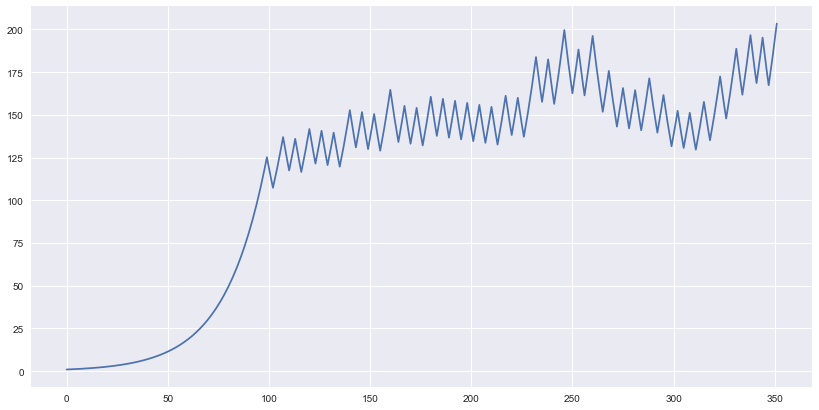

In [54]:
price_array2 = gen_stock_price_array2()
plt.plot(price_array2)
plt.show()

第三个条件加入:
如果股价连续下跌3天,第4天及以后存在系统性灾难概率,概率为20%,表现形式为股价下跌50%

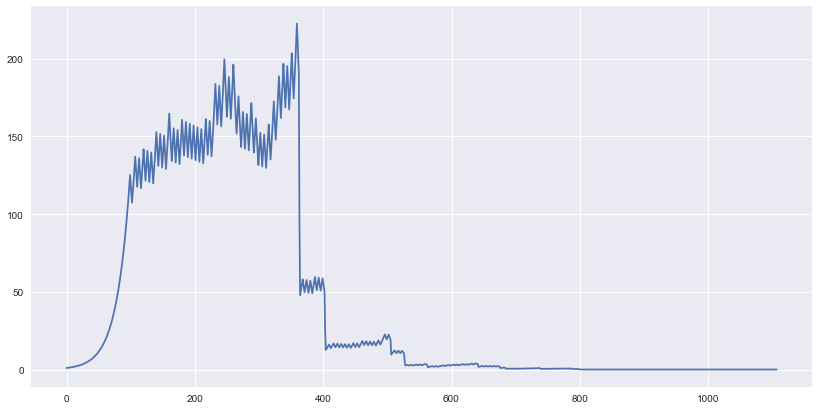

In [56]:
def gen_stock_price_array3():
    price_array = np.concatenate(
        (price_array2, np.ones(trade_day) * price_array2[-1]), axis=0
    )
    for ind in np.arange(len(price_array2)-1, len(price_array) - 1):
         # 获取当前叫日为基准的四个交易日数据
        last4 = price_array[ind - 3: ind + 1]
        if len(last4) == 4 and last4[-1] > last4[-2] and last4[-2] > last4[-3] and last4[-3] > last4[-4]:
            # 如果连续上涨了3天,第4天及以后下跌的概率为55%
            win = np.random.binomial(1, 0.45)
        elif len(last4) == 4 and last4[-1] < last4[-2] and last4[-2] < last4[-3] and last4[-3] < last4[-4]:
            # 如果连续下跌了3天,第4天及以后上涨的概率为80%
            win = np.random.binomial(1, 0.8)
            if not win:
                price_array[ind+1] = (1-0.5) * price_array[ind]
                continue
        else:
            win = price_array[ind] >= price_array[ind - 1]
            
        if win:
            price_array[ind + 1] = (1+0.05) * price_array[ind]
        else:
            price_array[ind + 1] = (1- 0.05) * price_array[ind]
        # 股价小于0.1,股价归0 退出市场
        if price_array[ind + 1] <=0.1:
            price_array[ind + 1:] = 0
            break
    return price_array


## 7.2.3 三只小猪股票投资的故事

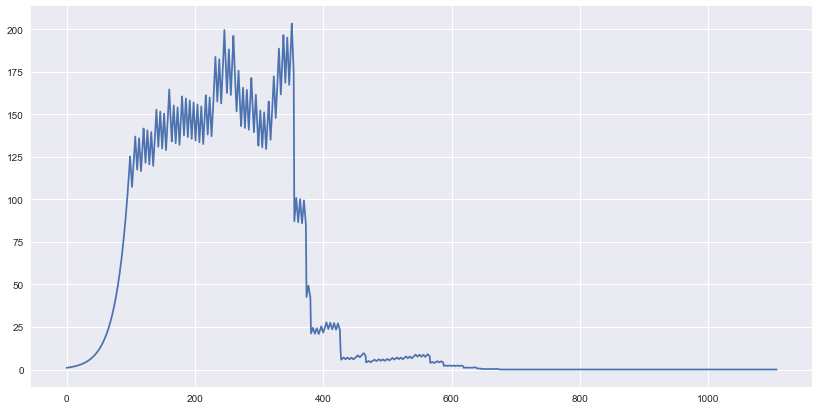

In [57]:
trade_day = 252 * 3
price_array3 = gen_stock_price_array3()
plt.plot(price_array3)
plt.show()

爆仓了
猪老大最终资产0
猪老大资产最高峰值10000.0


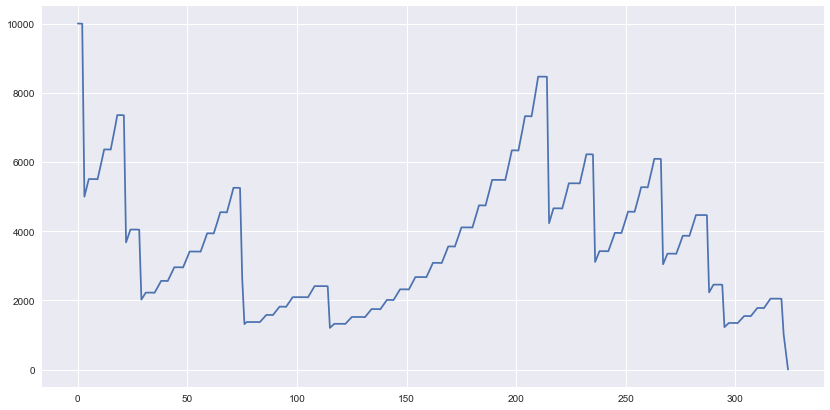

In [64]:
def execute_trade(cash, buy_rate):
    commission=5
    stock_cnt = 0
    keep_day = 0
    capital =[]
    for ind in np.arange(352, len(price_array3) - 1):
        if stock_cnt > 0:
            keep_day +=1
        if stock_cnt > 0 and keep_day == 3:
            cash += price_array3[ind] * stock_cnt
            cash -= commission
            if cash <=0:
                capital.append(0)
                print('爆仓了')
                break
            keep_day = 0
            stock_cnt = 0
        # 获取当前交易日为基准5个交易日数据,5个交易日价格到4个交易日的涨跌情况
        last5 = price_array3[ind - 4: ind +1]
        # 买入条件 example:last5 = [82.4, 86.5 82.2 81.1 74.3]
        # 1.持有股票 stock_cnt = 0
        # 2.last5 第一个交易日上涨,后面三个下跌
        if stock_cnt == 0 and len(last5) == 5 and last5[1] > last5[0] and last5[-1] < last5[-2] and last5[-2] < last5[-3] and last5[-3] < last5[-4]:
            cash -= commission
            # 按照资金仓位管理buy_rate买入
            buy_cash = (cash * buy_rate)
            cash -= buy_cash
            stock_cnt += buy_cash / price_array3[ind]
            
            if stock_cnt < 1:
                captial.append(0)
                print('爆仓了')
                break
            keep_day = 0
        capital.append(cash + (stock_cnt* price_array3[ind]))
    return capital

# 第一个小猪投资
pig_one_cash = 10000
buy_rate = 1.0
pig_one_capital = execute_trade(pig_one_cash, buy_rate)
print('猪老大最终资产{}'.format(pig_one_capital[-1]))
print('猪老大资产最高峰值{}'.format(max(pig_one_capital)))
plt.plot(pig_one_capital)
plt.show()


猪老二 buy_rate = 0.6 最终资产为7665

猪老二最终资产3215.9239694392936
猪老二资产最高峰值14549.418348657253


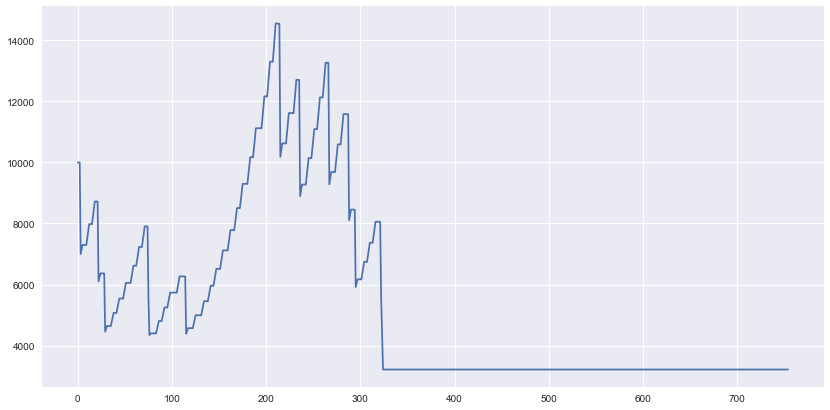

In [68]:
pig_two_cash = 10000
buy_rate = 0.6
pig_two_capital= execute_trade(pig_two_cash, buy_rate)
print('猪老二最终资产{}'.format(pig_two_capital[-1]))
print('猪老二资产最高峰值{}'.format(max(pig_two_capital)))
plt.plot(pig_two_capital)
plt.show()

猪老三 buy_rate = 0.13 最终资产

猪老三最终资产9044.562488936352
猪老三资产最高峰值11483.196324703025


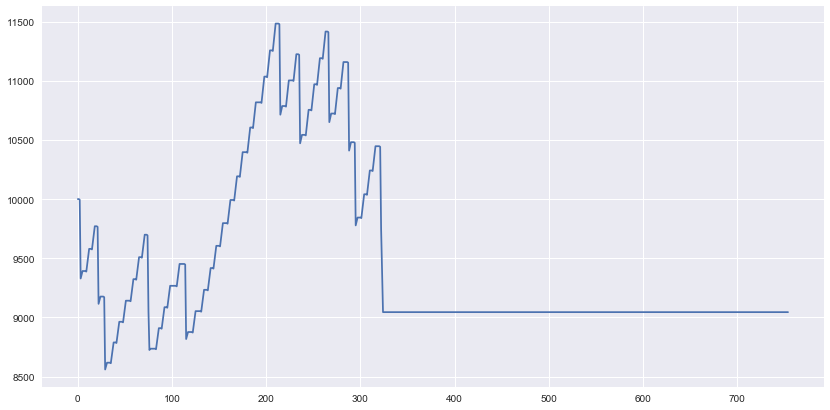

In [70]:
pig_three_cash = 10000
buy_rate = 0.8 - 0.2 / (0.15 / 0.5)
pig_three_capital= execute_trade(pig_three_cash, buy_rate)
print('猪老三最终资产{}'.format(pig_three_capital[-1]))
print('猪老三资产最高峰值{}'.format(max(pig_three_capital)))
plt.plot(pig_three_capital)
plt.show()